# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {"units": "imperial"}

print(f"Beginning Data Retrieval" + "\n" + "--------------------------------------------")

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record_counter = 1

for city in cities:
    try:
        query_url = f"{url}q={city}&appid={api_key}"
        response = requests.get(query_url, params=params).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {record_counter} of {len(cities)}" + "| " + str(city))
    except:
        print(f"City not found, skipping.")
        pass
    record_counter = record_counter + 1

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of 637| dikson
Processing Record 2 of 637| hithadhoo
Processing Record 3 of 637| georgetown
Processing Record 4 of 637| albany
Processing Record 5 of 637| avarua
Processing Record 6 of 637| puerto ayora
Processing Record 7 of 637| mataura
Processing Record 8 of 637| manado
Processing Record 9 of 637| castro
Processing Record 10 of 637| alice springs
Processing Record 11 of 637| eirunepe
Processing Record 12 of 637| isangel
Processing Record 13 of 637| hobart
Processing Record 14 of 637| san cristobal
Processing Record 15 of 637| port elizabeth
Processing Record 16 of 637| vaini
Processing Record 17 of 637| busselton
Processing Record 18 of 637| san policarpo
Processing Record 19 of 637| ushuaia
Processing Record 20 of 637| de aar
Processing Record 21 of 637| atuona
Processing Record 22 of 637| paray-le-monial
Processing Record 23 of 637| cape town
Processing Record 24 of 637| birjand
Processing Re

Processing Record 218 of 637| baniachang
Processing Record 219 of 637| moron
Processing Record 220 of 637| kavaratti
Processing Record 221 of 637| riberalta
Processing Record 222 of 637| los llanos de aridane
Processing Record 223 of 637| jumla
Processing Record 224 of 637| valparaiso
Processing Record 225 of 637| lavrentiya
Processing Record 226 of 637| sao geraldo do araguaia
City not found, skipping.
Processing Record 228 of 637| tacoronte
Processing Record 229 of 637| saint-philippe
Processing Record 230 of 637| temiscaming
Processing Record 231 of 637| port hardy
Processing Record 232 of 637| artesia
Processing Record 233 of 637| sioux lookout
Processing Record 234 of 637| berlevag
Processing Record 235 of 637| khandyga
Processing Record 236 of 637| havelock
Processing Record 237 of 637| erzin
Processing Record 238 of 637| chapais
Processing Record 239 of 637| martinopolis
Processing Record 240 of 637| soresina
Processing Record 241 of 637| presidente medici
Processing Record 242 

Processing Record 435 of 637| zatoka
Processing Record 436 of 637| tucumcari
Processing Record 437 of 637| burnie
Processing Record 438 of 637| wanaka
Processing Record 439 of 637| iberia
Processing Record 440 of 637| wagar
Processing Record 441 of 637| namibe
City not found, skipping.
Processing Record 443 of 637| okha
Processing Record 444 of 637| mahibadhoo
City not found, skipping.
Processing Record 446 of 637| manzhouli
Processing Record 447 of 637| boende
Processing Record 448 of 637| changqing
Processing Record 449 of 637| kushmurun
Processing Record 450 of 637| wladyslawowo
Processing Record 451 of 637| brakel
Processing Record 452 of 637| dinghai
City not found, skipping.
Processing Record 454 of 637| hirara
Processing Record 455 of 637| port antonio
Processing Record 456 of 637| havre-saint-pierre
Processing Record 457 of 637| kieta
Processing Record 458 of 637| ilulissat
Processing Record 459 of 637| olinda
City not found, skipping.
Processing Record 461 of 637| beloha
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame({"City": city_name, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity,
                       "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed})
city_df.to_csv("output_data/cities.csv")
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,99,RU,1612498876,88,73.5069,80.5464,-14.26,10.49
1,Hithadhoo,100,MV,1612498856,76,-0.6000,73.0833,82.54,11.52
2,George Town,20,MY,1612499022,51,5.4112,100.3354,87.80,2.30
3,Albany,18,US,1612498809,64,42.6001,-73.9662,26.01,2.82
4,Avarua,97,CK,1612498989,65,-21.2078,-159.7750,84.20,6.91
...,...,...,...,...,...,...,...,...,...
579,Whitianga,43,NZ,1612499112,58,-36.8333,175.7000,68.04,4.92
580,Troitskoye,100,RU,1612499112,94,52.9821,84.6757,14.02,2.62
581,Waddān,17,LY,1612499055,87,29.1614,16.1390,55.99,4.29
582,Rio Branco,75,BR,1612499112,100,-9.9747,-67.8100,75.20,4.61


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
clean_city_df = city_df[city_df["Humidity"] < 100]
clean_city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,99,RU,1612498876,88,73.5069,80.5464,-14.26,10.49
1,Hithadhoo,100,MV,1612498856,76,-0.6000,73.0833,82.54,11.52
2,George Town,20,MY,1612499022,51,5.4112,100.3354,87.80,2.30
3,Albany,18,US,1612498809,64,42.6001,-73.9662,26.01,2.82
4,Avarua,97,CK,1612498989,65,-21.2078,-159.7750,84.20,6.91
...,...,...,...,...,...,...,...,...,...
578,Itainópolis,4,BR,1612499112,70,-7.4469,-41.4783,74.95,1.99
579,Whitianga,43,NZ,1612499112,58,-36.8333,175.7000,68.04,4.92
580,Troitskoye,100,RU,1612499112,94,52.9821,84.6757,14.02,2.62
581,Waddān,17,LY,1612499055,87,29.1614,16.1390,55.99,4.29


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

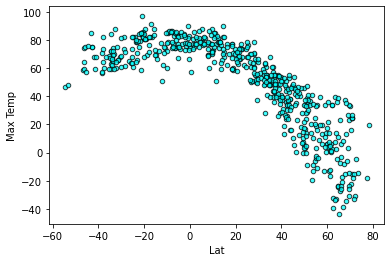

In [21]:
clean_city_df.plot.scatter("Lat", "Max Temp", alpha=0.75, edgecolor="black", color="cyan")
#don't forget the gridlines!

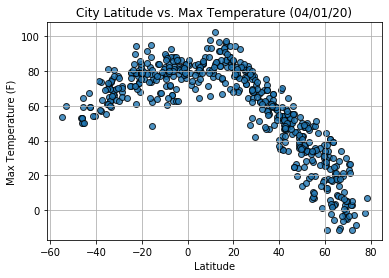

## Latitude vs. Humidity Plot

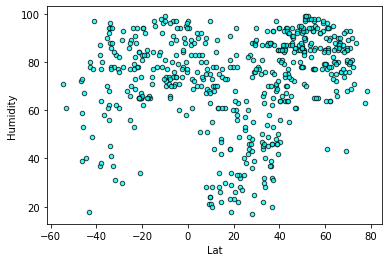

In [15]:
clean_city_df.plot.scatter("Lat", "Humidity", alpha=0.75, edgecolor="black", color="cyan")

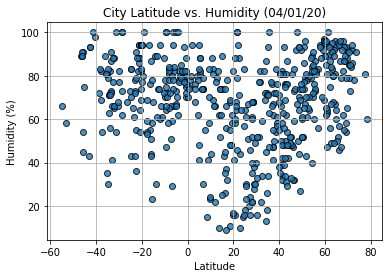

## Latitude vs. Cloudiness Plot

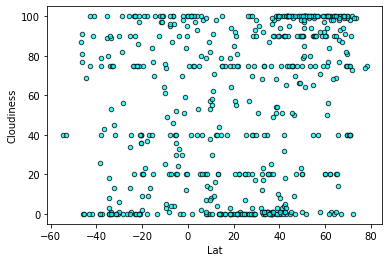

In [16]:
clean_city_df.plot.scatter("Lat", "Cloudiness", alpha=0.75, edgecolor="black", color="cyan")

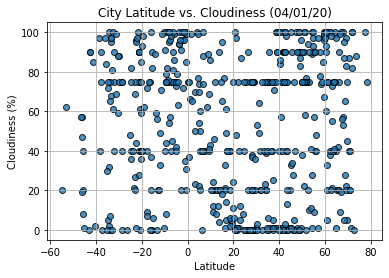

## Latitude vs. Wind Speed Plot

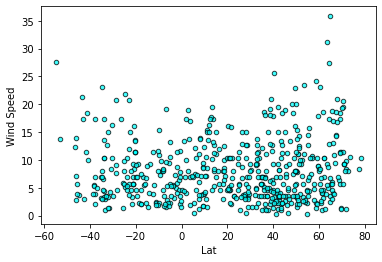

In [17]:
clean_city_df.plot.scatter("Lat", "Wind Speed", alpha=0.75, edgecolor="black", color="cyan")

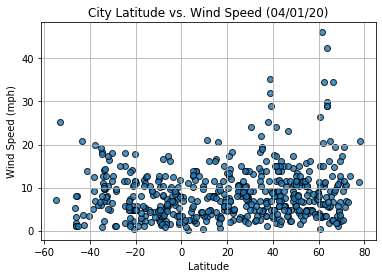

## Linear Regression

In [27]:
#Don't forget this!
#Don't forget the rvalues!

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

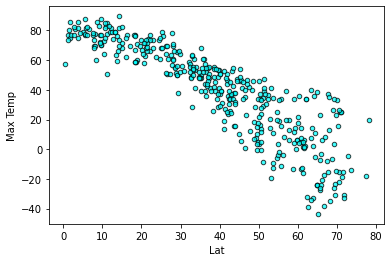

In [23]:
north_hem = clean_city_df[clean_city_df["Lat"] >= 0]
north_hem.plot.scatter("Lat", "Max Temp", alpha=0.75, edgecolor="black", color="cyan")

The r-value is: 0.46937863826630627


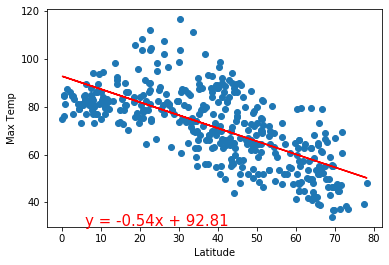

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

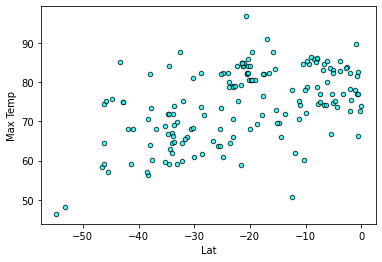

In [24]:
south_hem = clean_city_df[clean_city_df["Lat"] < 0]
south_hem.plot.scatter("Lat", "Max Temp", alpha=0.75, edgecolor="black", color="cyan")

The r-value is: 0.6082708688906918


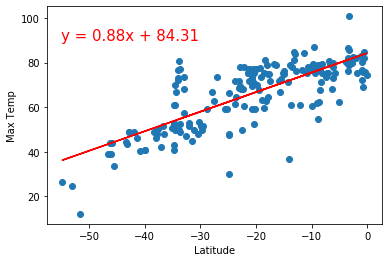

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

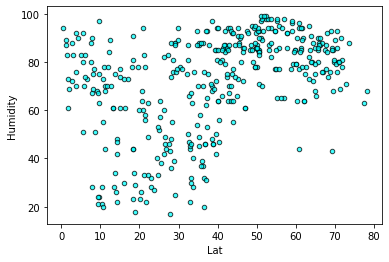

In [25]:
north_hem.plot.scatter("Lat", "Humidity", alpha=0.75, edgecolor="black", color="cyan")

The r-value is: 0.000543987878808455


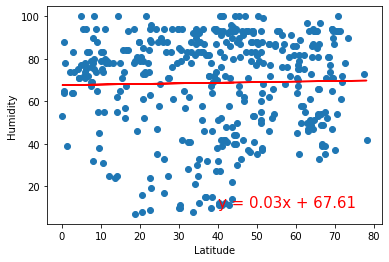

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

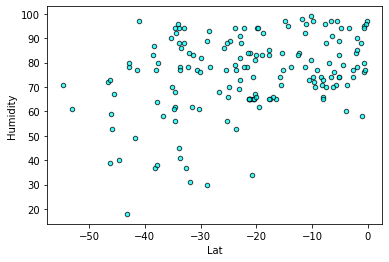

In [26]:
south_hem.plot.scatter("Lat", "Humidity", alpha=0.75, edgecolor="black", color="cyan")

The r-value is: 0.014985174297345524


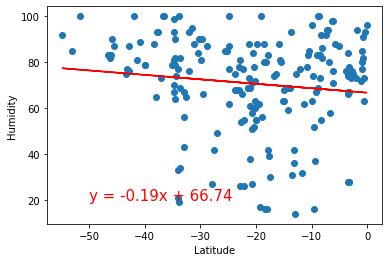

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

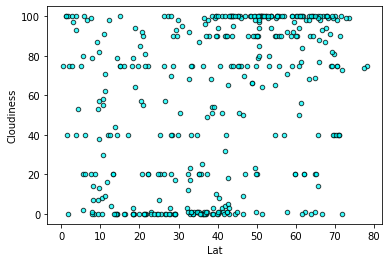

In [28]:
north_hem.plot.scatter("Lat", "Cloudiness", alpha=0.75, edgecolor="black", color="cyan")

The r-value is: 0.0020898727664228514


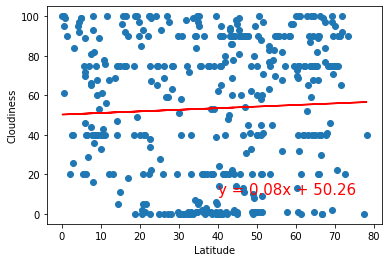

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

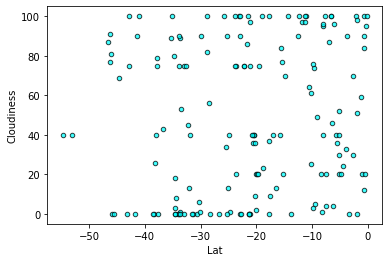

In [29]:
south_hem.plot.scatter("Lat", "Cloudiness", alpha=0.75, edgecolor="black", color="cyan")

The r-value is: 0.0035263772085582894


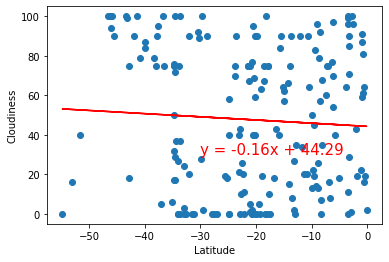

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

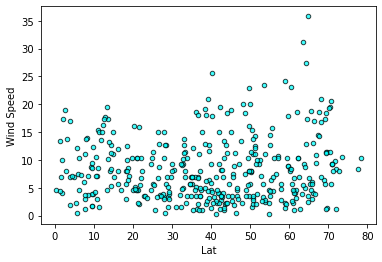

In [30]:
north_hem.plot.scatter("Lat", "Wind Speed", alpha=0.75, edgecolor="black", color="cyan")

The r-value is: 0.04019723576144484


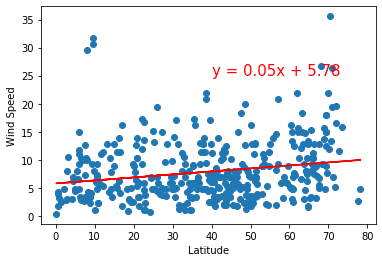

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

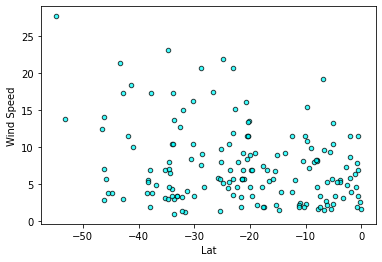

In [31]:
south_hem.plot.scatter("Lat", "Wind Speed", alpha=0.75, edgecolor="black", color="cyan")

The r-value is: 0.017128274759839232


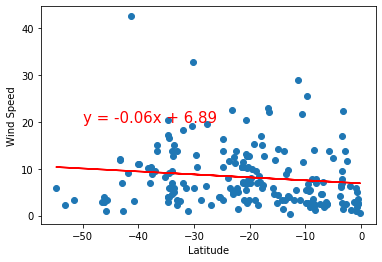